In [1]:
# https://github.com/jina-ai/vectordb/
from docarray import BaseDoc
from docarray.typing import NdArray
from docarray import DocList
import numpy as np
import pandas as pd
from vectordb import InMemoryExactNNVectorDB, HNSWVectorDB


class Point(BaseDoc):
    point_id: str = ""
    embedding: NdArray[2]


# Specify your workspace path
db = HNSWVectorDB[Point](workspace="./workspace_path")

# Index a list of documents with random embeddings
doc_list = [
    Point(point_id=f"point_{i}", embedding=np.random.rand(2)) for i in range(1000)
]

db.index(inputs=DocList[Point](doc_list))

<DocList[Point] (length=1000)>

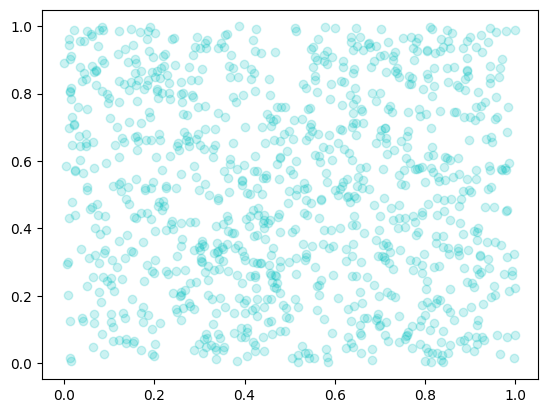

In [2]:
import matplotlib.pyplot as plt


for doc in doc_list:
    x = doc.embedding[0]
    y = doc.embedding[1]
    plt.scatter(x, y, c="c", alpha=0.2)

In [7]:
# Perform a search query
query = Point(text="query_point", embedding=np.array([0.1, 0.4]))
results = db.search(inputs=DocList[Point]([query]), limit=20)

# Print out the matches
result_ids = []
for m in list(results[0].matches):
    result_ids.append(m)

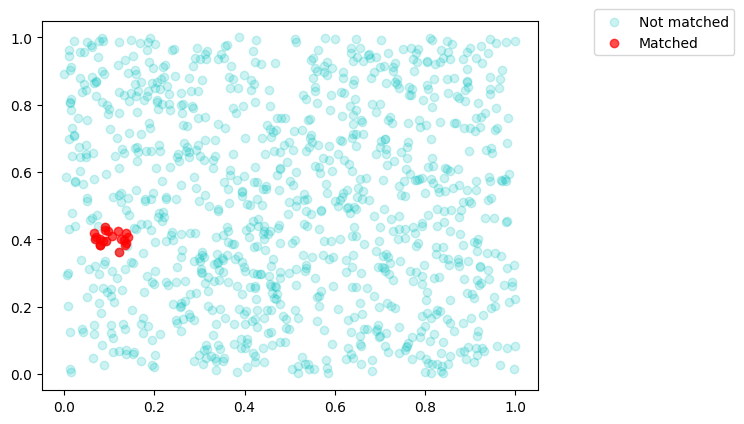

In [8]:
match_x = [doc.embedding[0] for doc in result_ids]
match_y = [doc.embedding[1] for doc in result_ids]
not_match_x = [doc.embedding[0] for doc in doc_list if doc.id not in result_ids]
not_match_y = [doc.embedding[1] for doc in doc_list if doc.id not in result_ids]



plt.scatter(not_match_x, not_match_y, c="c", alpha=0.2, label="Not matched")
plt.scatter(match_x, match_y, c="r", alpha=0.7, label="Matched")
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()